In [2]:
# https://github.com/agile-geoscience/striplog/blob/master/tutorial/Striplog_basics.ipynb

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import striplog
striplog.__version__

'0.8.3'

In [4]:
from striplog import Legend, Lexicon, Interval, Component

In [5]:
legend = Legend.builtin('NSDOE')
lexicon = Lexicon.default()

In [6]:
from striplog import Striplog
print(Striplog.__doc__)


    A Striplog is a sequence of intervals.

    We will build them from LAS files or CSVs.

    Args:
        list_of_Intervals (list): A list of Interval objects.
        source (str): A source for the data. Default None.
        order (str): 'auto', 'depth', 'elevation', or 'none'. Please refer to
            the documentation for details. Best idea is to let the default
            work. Default: 'auto'.
    


In [7]:
imgfile = "M-MG-70_14.3_135.9.png"

In [8]:
strip = Striplog.from_image(imgfile, 14.3, 135.9, legend=legend)

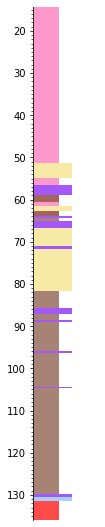

In [12]:
strip.plot(legend, ladder=True, aspect=5)

In [13]:
print(strip[:5])

{'top': Position({'middle': 14.3, 'units': 'm'}), 'base': Position({'middle': 51.24117647058824, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}
{'top': Position({'middle': 51.24117647058824, 'units': 'm'}), 'base': Position({'middle': 54.81764705882354, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'})]}
{'top': Position({'middle': 54.81764705882354, 'units': 'm'}), 'base': Position({'middle': 56.55882352941177, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}
{'top': Position({'middle': 56.55882352941177, 'units': 'm'}), 'base': Position({'middle': 58.86470588235295, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'dolomite'})]}
{'top': Position({'middle': 58.86470588235295, 'units': 'm'}), 'base': Position({'middle': 60.464705882352945, 'units': 'm'}), 

In [14]:
strip.unique

[(Component({'lithology': 'siltstone', 'colour': 'grey'}), 46.16470588235293),
 (Component({'lithology': 'anhydrite'}), 39.67058823529412),
 (Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'}),
  19.200000000000003),
 (Component({'lithology': 'dolomite'}), 8.282352941176498),
 (Component({'lithology': 'volcanic'}), 4.42352941176469),
 (Component({'lithology': 'siltstone', 'colour': 'red'}), 2.7764705882352843),
 (Component({'lithology': 'limestone'}), 1.082352941176481)]

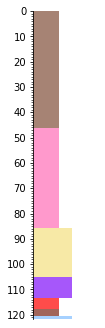

In [18]:
depth = 0
list_of_int = []
for i in strip.unique:
    list_of_int.append(Interval(depth, depth+i[1], components=[i[0]]))
    depth += i[1]
    
Striplog(list_of_int).plot(legend, aspect=3)

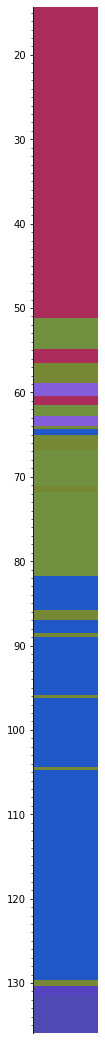

In [19]:
strip.plot()

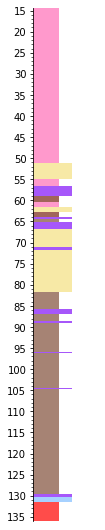

In [20]:
strip.plot(legend, ladder=True, aspect=5, ticks=5)

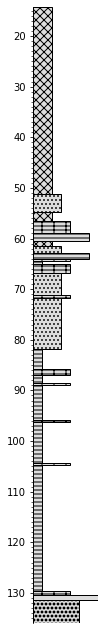

In [23]:
hashy_csv = """colour,width,hatch,component colour,component grainsize,component lithology
#dddddd,1,---,grey,,siltstone,
#dddddd,2,xxx,,,anhydrite,
#dddddd,3,...,grey,vf-f,sandstone,
#dddddd,4,+--,,,dolomite,
#dddddd,5,ooo,,,volcanic,
#dddddd,6,---,red,,siltstone,
#dddddd,7,,,,limestone,
"""
hashy = Legend.from_csv(text=hashy_csv)
strip.plot(hashy, ladder=True, aspect=6, lw=1)

In [24]:
print(strip[:3])

{'top': Position({'middle': 14.3, 'units': 'm'}), 'base': Position({'middle': 51.24117647058824, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}
{'top': Position({'middle': 51.24117647058824, 'units': 'm'}), 'base': Position({'middle': 54.81764705882354, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'sandstone', 'colour': 'grey', 'grainsize': 'vf-f'})]}
{'top': Position({'middle': 54.81764705882354, 'units': 'm'}), 'base': Position({'middle': 56.55882352941177, 'units': 'm'}), 'description': '', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}


In [29]:
print(strip[-1].primary.summary())

Volcanic


In [30]:
for i in strip[:5]:
    print(i.summary())

36.94 m of anhydrite
3.58 m of sandstone, grey, vf-f
1.74 m of anhydrite
2.31 m of dolomite
1.60 m of siltstone, red


In [31]:
len(strip)

26

In [32]:
import numpy as np
np.array([d.top.z for d in strip[5:13]])

array([60.46470588, 61.45294118, 62.77058824, 63.94705882, 64.37058824,
       65.07647059, 66.77058824, 71.1       ])

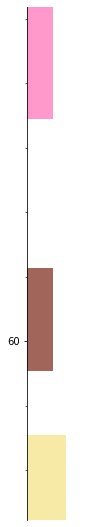

In [33]:
indices = [2,4,6]
strip[indices].plot(legend, aspect=5)

In [34]:
strip[1:3]

Striplog(2 Intervals, start=51.24117647058824, stop=56.55882352941177)

In [35]:
rock = strip.find('sandstone')[1].components[0]
rock2 = Component({'lithology':'shale', 'colour':'grey'})
iv = Interval(top=300, base=350, description='', components=[rock, rock2])

In [36]:
strip[-3:-1] + Striplog([iv])

Striplog(3 Intervals, start=129.68823529411765, stop=350.0)

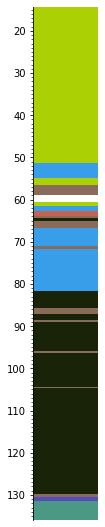

In [37]:
del strip[4]

strip.plot(aspect=5)

In [38]:
print(strip.to_las3())

~Lithology_Parameter
LITH .   Striplog         : Lithology source          {S}
LITHD.   MD               : Lithology depth reference {S}

~Lithology_Definition
LITHT.M                   : Lithology top depth       {F}
LITHB.M                   : Lithology base depth      {F}
LITHD.                    : Lithology description     {S}

~Lithology_Data | Lithology_Definition
14.3,51.24117647058824,Anhydrite
51.24117647058824,54.81764705882354,"Sandstone, grey, vf-f"
54.81764705882354,56.55882352941177,Anhydrite
56.55882352941177,58.86470588235295,Dolomite
60.464705882352945,61.45294117647059,Anhydrite
61.45294117647059,62.77058823529413,"Sandstone, grey, vf-f"
62.77058823529413,63.94705882352942,"Siltstone, red"
63.94705882352942,64.37058823529412,Dolomite
64.37058823529412,65.0764705882353,"Siltstone, grey"
65.0764705882353,66.77058823529413,Dolomite
66.77058823529413,71.10000000000001,"Sandstone, grey, vf-f"
71.10000000000001,71.80588235294118,Dolomite
71.80588235294118,81.78235294117647

In [39]:
strip.source

'Image'

In [40]:
csv_string = """top, base, lithology
  200.000,  230.329,  Anhydrite                                       
  230.329,  233.269,  Grey vf-f sandstone                             
  233.269,  234.700,  Anhydrite                                       
  234.700,  236.596,  Dolomite                                        
  236.596,  237.911,  Red siltstone                                   
  237.911,  238.723,  Anhydrite                                       
  238.723,  239.807,  Grey vf-f sandstone                             
  239.807,  240.774,  Red siltstone                                   
  240.774,  241.122,  Dolomite                                        
  241.122,  241.702,  Grey siltstone                                  
  241.702,  243.095,  Dolomite                                        
  243.095,  246.654,  Grey vf-f sandstone                             
  246.654,  247.234,  Dolomite                                        
  247.234,  255.435,  Grey vf-f sandstone                             
  255.435,  258.723,  Grey siltstone                                  
  258.723,  259.729,  Dolomite                                        
  259.729,  260.967,  Grey siltstone                                  
  260.967,  261.354,  Dolomite                                        
  261.354,  267.041,  Grey siltstone                                  
  267.041,  267.350,  Dolomite                                        
  267.350,  274.004,  Grey siltstone                                  
  274.004,  274.313,  Dolomite                                        
  274.313,  294.816,  Grey siltstone                                  
  294.816,  295.397,  Dolomite                                        
  295.397,  296.286,  Limestone                                       
  296.286,  300.000,  Volcanic                                        
"""

In [42]:
strip2 = Striplog.from_csv(text=csv_string, lexicon=lexicon)
strip2

Striplog(26 Intervals, start=200.0, stop=300.0)

In [43]:
Component.from_text('Grey vf-f sandstone', lexicon)

lithology,sandstone
grainsize,vf-f
colour,grey


In [44]:
las3 = """~Lithology_Parameter
LITH .                    : Lithology source          {S}
LITHD.   MD               : Lithology depth reference {S}

~Lithology_Definition
LITHT.M                   : Lithology top depth       {F}
LITHB.M                   : Lithology base depth      {F}
LITHN.                    : Lithology name            {S}

~Lithology_Data | Lithology_Definition
  200.000,  230.329,  Anhydrite                                       
  230.329,  233.269,  Grey vf-f sandstone                             
  233.269,  234.700,  Anhydrite                                       
  234.700,  236.596,  Dolomite                                        
  236.596,  237.911,  Red siltstone                                   
  237.911,  238.723,  Anhydrite                                       
  238.723,  239.807,  Grey vf-f sandstone                             
  239.807,  240.774,  Red siltstone                                   
  240.774,  241.122,  Dolomite                                        
  241.122,  241.702,  Grey siltstone                                  
  241.702,  243.095,  Dolomite                                        
  243.095,  246.654,  Grey vf-f sandstone                             
  246.654,  247.234,  Dolomite                                        
  247.234,  255.435,  Grey vf-f sandstone                             
  255.435,  258.723,  Grey siltstone                                  
  258.723,  259.729,  Dolomite                                        
  259.729,  260.967,  Grey siltstone                                  
  260.967,  261.354,  Dolomite                                        
  261.354,  267.041,  Grey siltstone                                  
  267.041,  267.350,  Dolomite                                        
  267.350,  274.004,  Grey siltstone                                  
  274.004,  274.313,  Dolomite                                        
  274.313,  294.816,  Grey siltstone                                  
  294.816,  295.397,  Dolomite                                        
  295.397,  296.286,  Limestone                                       
  296.286,  300.000,  Volcanic                                        
"""

In [45]:
strip3 = Striplog.from_las3(las3, lexicon)
print(strip3)

{'top': Position({'middle': 200.0, 'units': 'm'}), 'base': Position({'middle': 230.329, 'units': 'm'}), 'description': 'Anhydrite', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}
{'top': Position({'middle': 230.329, 'units': 'm'}), 'base': Position({'middle': 233.269, 'units': 'm'}), 'description': 'Grey vf-f sandstone', 'data': {}, 'components': [Component({'lithology': 'sandstone', 'grainsize': 'vf-f', 'colour': 'grey'})]}
{'top': Position({'middle': 233.269, 'units': 'm'}), 'base': Position({'middle': 234.7, 'units': 'm'}), 'description': 'Anhydrite', 'data': {}, 'components': [Component({'lithology': 'anhydrite'})]}
{'top': Position({'middle': 234.7, 'units': 'm'}), 'base': Position({'middle': 236.596, 'units': 'm'}), 'description': 'Dolomite', 'data': {}, 'components': [Component({'lithology': 'dolomite'})]}
{'top': Position({'middle': 236.596, 'units': 'm'}), 'base': Position({'middle': 237.911, 'units': 'm'}), 'description': 'Red siltstone', 'data': {}, 'comp

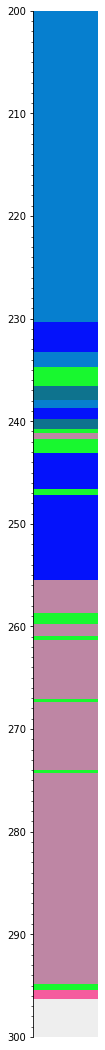

In [47]:
strip3.plot()

## My attempts

In [69]:
imgfile = "lithofacies_1.png"

In [70]:
strip = Striplog.from_image(imgfile, 4419.2, 4718.9, legend=legend)

C:\Users\LBHAWZ\AppData\Local\Continuum\anaconda3\lib\site-packages\striplog\legend.py:838: UserWarning: No match found for #ff8000 with tolerance of 0. Best match is Volcanic, #ff4c4a, d=90.44335243676011
  warnings.warn(w)
C:\Users\LBHAWZ\AppData\Local\Continuum\anaconda3\lib\site-packages\striplog\legend.py:838: UserWarning: No match found for #ffff00 with tolerance of 0. Best match is Sandstone, grey, f-m, #f2ff42, d=67.26812023536856
  warnings.warn(w)
C:\Users\LBHAWZ\AppData\Local\Continuum\anaconda3\lib\site-packages\striplog\legend.py:838: UserWarning: No match found for #dfdfdf with tolerance of 0. Best match is Heterolithic, grey, #dbd6bc, d=36.359317925395686
  warnings.warn(w)
C:\Users\LBHAWZ\AppData\Local\Continuum\anaconda3\lib\site-packages\striplog\legend.py:838: UserWarning: No match found for #ffff01 with tolerance of 0. Best match is Sandstone, grey, f-m, #f2ff42, d=66.2872536767062
  warnings.warn(w)
C:\Users\LBHAWZ\AppData\Local\Continuum\anaconda3\lib\site-package

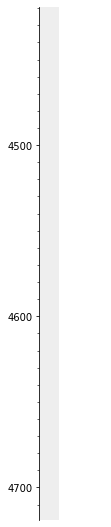

In [71]:
strip.plot(legend, ladder=True, aspect=5)

In [65]:
help(strip.plot)

Help on method plot in module striplog.striplog:

plot(legend=None, width=1.5, ladder=True, aspect=10, ticks=(1, 10), match_only=None, ax=None, return_fig=False, colour=None, cmap='viridis', default=None, style='intervals', field=None, **kwargs) method of striplog.striplog.Striplog instance
    Hands-free plotting.
    
    Args:
        legend (Legend): The Legend to use for colours, etc.
        width (int): The width of the plot, in inches. Default 1.
        ladder (bool): Whether to use widths or not. Default False.
        aspect (int): The aspect ratio of the plot. Default 10.
        ticks (int or tuple): The (minor,major) tick interval for depth.
            Only the major interval is labeled. Default (1,10).
        match_only (list): A list of strings matching the attributes you
            want to compare when plotting.
        ax (ax): A maplotlib axis to plot onto. If you pass this, it will
            be returned. Optional.
        return_fig (bool): Whether or not to re